# us-accidents-analysis

TODO 
- About the dataset (source, what it contains, how it will be usefull)
- Kaggle
- Information oabout accidents
- can be useful to prevent accidents
- Mentioned that this does not contains data about New York

## Data Loading

In [1]:
# search opendatasets jovian on google. open github find bellow command
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: emchandrakant
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:01<00:00, 172MB/s]


In [3]:
data_filename = './us-accidents/US_Accidents_Dec21_updated.csv'

## Data Preparation and cleaning
1. load libraries
2. look at some information about data & columns 
3. fix any missing or incorrect values

In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv(data_filename)

In [ ]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [ ]:
print('Total columns:', len(df.columns))
print('Numeric columns:', len(df.select_dtypes(include=['float','int']).columns))

Total columns: 47
Numeric columns: 14


Percentage of missing values

In [ ]:
percent_missing = df.isnull().sum()/ len(df)

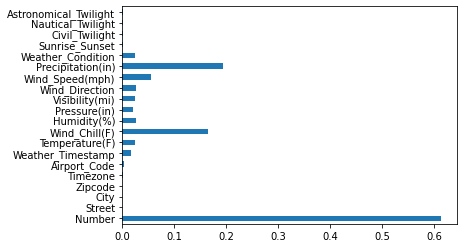

In [ ]:
percent_missing[percent_missing != 0].plot(kind='barh')

Remove Columns which have more than 50 % null values. 
Remove Columns that you don't want to use.

In [6]:
df.drop('Number', axis=1, inplace=True)

## Exploratory Analysis and Visualization
Columns we'll analyze
1. City
2. Start Time
3. Start Lat, Start Lng
4. Temperature
5. Weather Condition

#### City

In [ ]:
cities = df.City.unique()
print('Number of Unique Cities in US', len(cities))

Number of Unique Cities in US 11682


In [ ]:
cities_by_accident = df.City.value_counts()
cities_by_accident[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

In [ ]:
'NY' in df.State

False

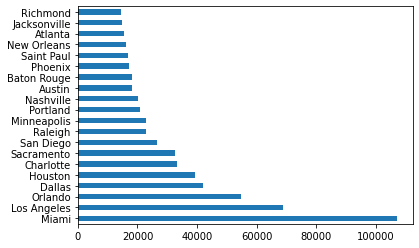

In [ ]:
cities_by_accident[:20].plot(kind='barh')

In [9]:
import seaborn as sns 
sns.set_style('darkgrid')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


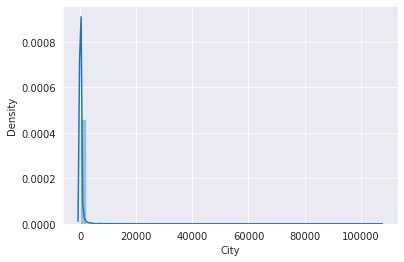

In [ ]:
sns.distplot(cities_by_accident)

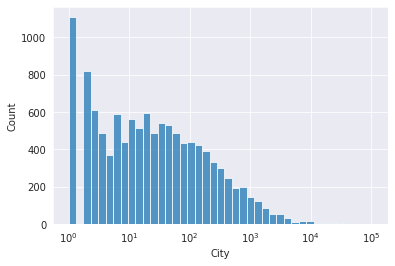

In [ ]:
sns.histplot(cities_by_accident, log_scale=True)

In [ ]:
cities_by_accident[cities_by_accident == 1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

In [ ]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [ ]:
len(high_accident_cities) / len(cities)

0.04245848313644924

#### Start Time

In [ ]:
df.Start_Time[0]

'2016-02-08 00:37:08'

In [ ]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [ ]:
df.Start_Time[0].hour

0

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


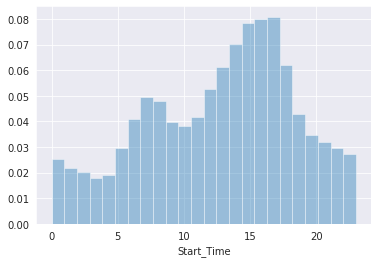

In [ ]:
# df['Hour'] = pd.DatetimeIndex(df.Start_Time).hour

sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

High percentage of accidents are happening between 2 pm to 5 pm.

Next high percentage is in morning time between 7 am to 8 am

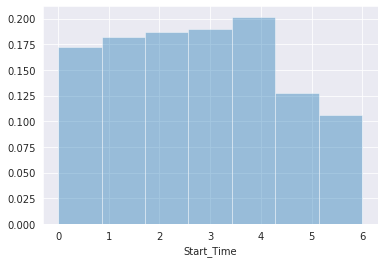

In [ ]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

On weekend accident proportion is low.

Is the distribution of accident by hour is same on weekends as on weekdays.

In [ ]:
Weekend_Start_Time = df.Start_Time[(df.Start_Time.dt.dayofweek == 5) | (df.Start_Time.dt.dayofweek == 6)]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


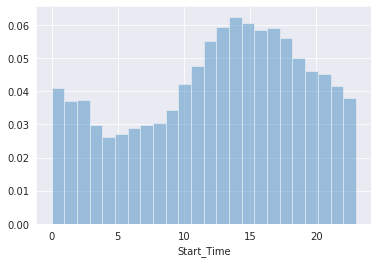

In [ ]:
sns.distplot(Weekend_Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

In [ ]:
Monday_Start_Time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]

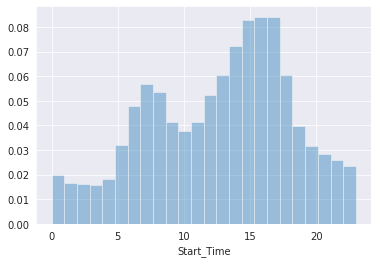

In [ ]:
sns.distplot(Monday_Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

On Weekends the peak of accident occures between 11 am to 6 pm unlike weekdays.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


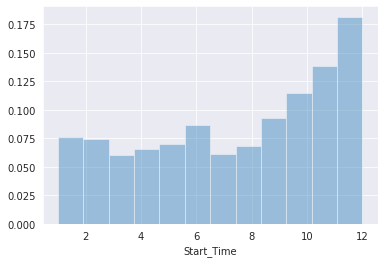

In [ ]:
sns.distplot(df.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

Monthwise it has been seen that in winter accidents are more likely to happen, but why?

lets see year wise. if there is data inconsistency.

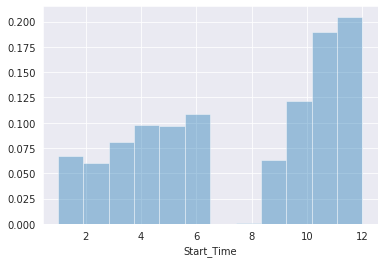

In [ ]:
df_2018 = df.Start_Time[df.Start_Time.dt.year == 2020]
sns.distplot(df_2018.dt.month, bins=12, kde=False, norm_hist=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


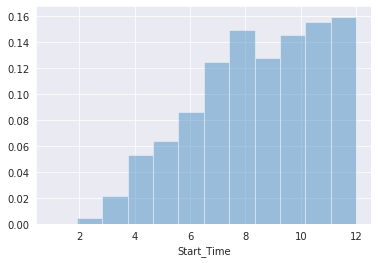

In [ ]:
df_2016 = df.Start_Time[df.Start_Time.dt.year == 2016]
sns.distplot(df_2016.dt.month, bins=12, kde=False, norm_hist=True)

major chunk of data is missing for year 2016 and 2020, thats why year wise accident trend can not be concluded.

#### Start Latitude & Longitude

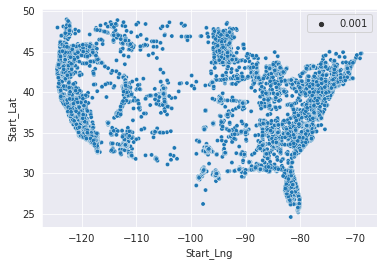

In [18]:
sample_df = df.sample(frac=0.01)
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [15]:
import folium

In [16]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]

map = folium.Map()
marker = folium.Marker((lat, lon))
marker.add_to(map)
map

In [19]:
from folium.plugins import HeatMap

map = folium.Map()
HeatMap(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng))).add_to(map)
map

## Ask & answer questions
1. Are there more accident in warmer or cold area.
2. Which 5 states have highest num of accident? How about per capita
3. Does New York show up in the data? If yes, why is the count lower if this the most populated city.
4. Among the top 100 cities in number of accident, which states do they belong most frequently.
5. What time of the day are accidents more frequent.
6. Which day of the week have the most accidents.
7. Which months have the most accidents.
8. what is trend of accidents year on year (increase or decrease)?
9. When is accident per unit is higher?

## Summary and Conclusion
Insights
1. No data from New York City
2. Less than 4.2 % of cities have more than 1000 yearly accidents
3. Maimi, Loss Angeles, Orlando, Dallas, Houstan are top 5 cities with most accidents.
4. Over 1100 cities have reported just one accident. Need to invistigate.
5. Number of accidents per city decreases exponentially.